In [17]:
(x_data[100:200]-x_data[100])*2 * np.pi* 1e6,

(array([  0.        ,   1.25663706,   2.51327412,   3.76991118,
          5.02654825,   6.28318531,   7.53982237,   8.79645943,
         10.05309649,  11.30973355,  12.56637061,  13.82300768,
         15.07964474,  16.3362818 ,  17.59291886,  18.84955592,
         20.10619298,  21.36283004,  22.61946711,  23.87610417,
         25.13274123,  26.38937829,  27.64601535,  28.90265241,
         30.15928947,  31.41592654,  32.6725636 ,  33.92920066,
         35.18583772,  36.44247478,  37.69911184,  38.9557489 ,
         40.21238597,  41.46902303,  42.72566009,  43.98229715,
         45.23893421,  46.49557127,  47.75220833,  49.0088454 ,
         50.26548246,  51.52211952,  52.77875658,  54.03539364,
         55.2920307 ,  56.54866776,  57.80530483,  59.06194189,
         60.31857895,  61.57521601,  62.83185307,  64.08849013,
         65.34512719,  66.60176426,  67.85840132,  69.11503838,
         70.37167544,  71.6283125 ,  72.88494956,  74.14158662,
         75.39822369,  76.65486075,  77.

Fitted parameters: [1.00000000e-01 3.00000000e-01 1.04352357e+00 6.83023763e-07
 9.68647780e-05 2.65167648e-01]


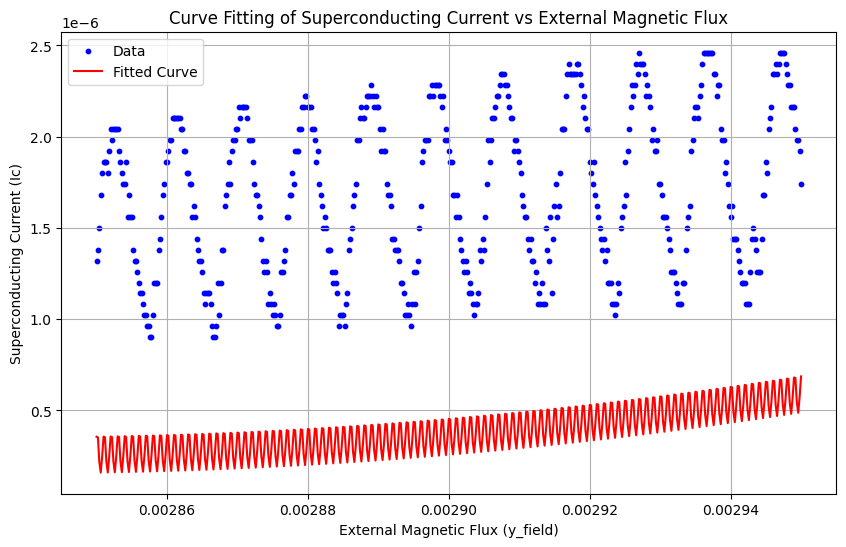

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
df = pd.read_csv('Ic/kay164Ic+.csv')
x_data = df['y_field'].values  # 外部磁通量
y_data = df['Ic'].values      # 超導電流

def func(x,a,b,c,d,e,f):
    return a*np.sin(x+c)/((1-b*(np.sin((x+c)/2))**2)**0.5)+d*x**2+e*x+f
# 曲线拟合
popt, pcov = curve_fit(
    func, 
    (x_data-x_data[0])*2 * np.pi* 1e6,  # 将磁通量转换为弧度
    (y_data-y_data[0])*1e6,
    bounds=((0.1, 0.3, -np.inf, -np.inf, -np.inf, -np.inf), 
            (np.inf, 1, np.inf, np.inf, np.inf, np.inf))
)
# 打印拟合参数
print("Fitted parameters:", popt)
# 绘制原始数据和拟合曲线
plt.figure(figsize=(10, 6)) 
plt.scatter(x_data, y_data, label='Data', color='blue', s=10)
plt.plot(x_data, func((x_data-x_data[0])*2 * np.pi* 1e6, *popt)*1e-6, label='Fitted Curve', color='red')
plt.xlabel('External Magnetic Flux (y_field)')
plt.ylabel('Superconducting Current (Ic)')
plt.title('Curve Fitting of Superconducting Current vs External Magnetic Flux')
plt.legend()
plt.grid()
plt.show()